<a href="https://colab.research.google.com/github/saikrishna1906/-BusinessCaseStudies/blob/main/Neural_Network_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 33.0MB/s]


,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


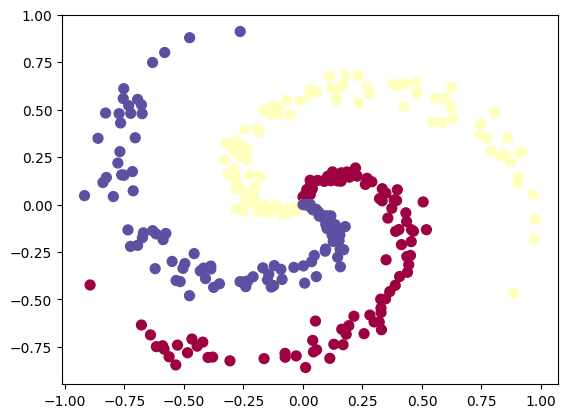

In [3]:
plt.scatter(x=df["x1"],y=df["x2"],c=df["y"],s=50,cmap=plt.cm.Spectral)

In [4]:
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

In [5]:
m=X.shape[0]
d=X.shape[1]

In [6]:
n=len(np.unique(y))

In [7]:
print(m,n,d)

300 3 2


In [8]:
W=np.random.randn(d,n)*0.01
b=np.zeros((1,n))

In [9]:
Z=np.dot(X,W)+b
print(np.shape(Z))

(300, 3)


In [10]:
exp_z = np.exp(Z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [11]:
dz=probs
dz[range(m),y]-=-1


In [12]:
dz=dz/m

In [13]:
dz.shape

(300, 3)

In [14]:
X.shape

(300, 2)

In [15]:
dW=np.dot(X.T,dz)

In [16]:
dW.shape

(2, 3)

In [17]:
lr=0.1
W+= -lr*dW
b+=-lr*np.sum(dz, axis=0, keepdims=True)

In [18]:
b

array([[-0.06666324, -0.06667118, -0.06666558]])

In [19]:
max_iters= 500
lr=0.1
m=X.shape[0]
d=X.shape[1]
n=len(np.unique(y))
W=0.01*np.random.randn(d,n)
b=np.zeros((1,n))
loss_history=[]
for i in range(max_iters):
  Z=np.dot(X,W)+b
  probs=np.exp(Z)/np.sum(np.exp(Z),axis=1,keepdims=True)
  #Calculating CCE
  error=-np.log(probs[range(m),y])
  loss=np.sum(error)/m
  loss_history.append(loss)
  if i%50==0:
    print(f"iteration:{i},loss:{loss}")


#Gradient
  dz=probs
  dz[range(m),y]-=1
  dz=dz/m
  dW=np.dot(X.T,dz)
  db=np.sum(dz,axis=0,keepdims=True)

#Gradient Descent
  W+=-lr*dW
  b+=-lr*db



iteration:0,loss:1.0989043428500236
iteration:50,loss:0.9761969300765895
iteration:100,loss:0.9036991898471062
iteration:150,loss:0.8584183349682091
iteration:200,loss:0.8286047380881311
iteration:250,loss:0.8080814385018874
iteration:300,loss:0.7934291333369341
iteration:350,loss:0.7826525140425851
iteration:400,loss:0.7745303470985857
iteration:450,loss:0.7682834358990057


In [20]:
def predict(X):
  Z= np.dot(X,W)+b
  Z_e=np.exp(Z)
  probs=Z_e/np.sum(Z_e,axis=1,keepdims=True)
  return np.argmax(probs,axis=1)
print(f"Traingin accuracy {np.sum(predict(X)==y)/m}")

Traingin accuracy 0.51


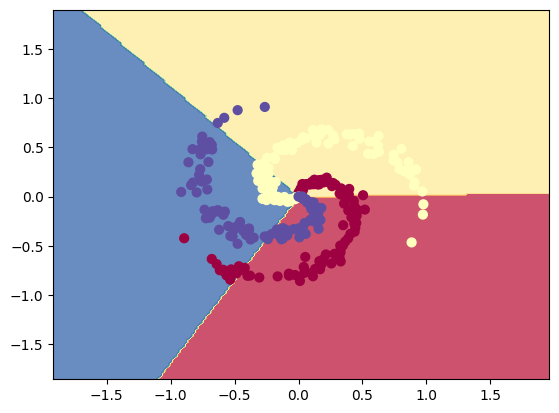

In [21]:
# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()